# HR - domain:     Salary Prediction   
## Model learning / creation phase

## using Machine learning, supervised - regression 

### Reading the dataset 

In [3]:
# importing the required library 
import pandas as pd    # used to handle the tablular/databse datas's. and also used for data analysis & data manipulation tasks

In [4]:
dataset = pd.read_csv("Salary_Data.csv")  # here we are assigning the dataset 'salary_data.csv' to the 'dataset' variable using pandas.read_csv function

In [5]:
dataset  # viewing the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### assign values for independent and dependent variable

In [6]:
# assign values for independent and dependent variable
independent = dataset[["YearsExperience"]]
# independent ->  input data

In [7]:
dependent = dataset[["Salary"]]
# dependent -> output data

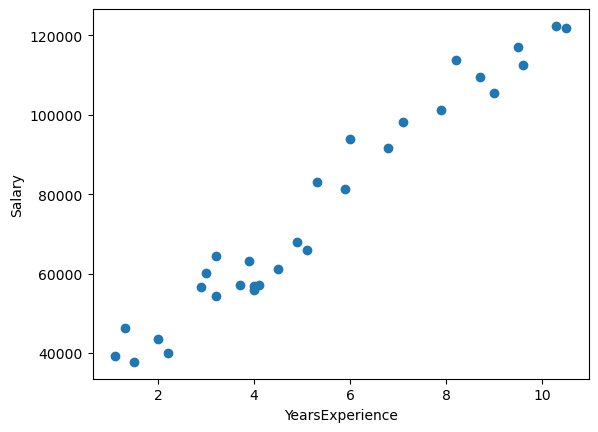

In [11]:
# plot the dataset - data visualizing 
import matplotlib.pyplot as plt 
plt.scatter(independent, dependent)
plt.xlabel('YearsExperience', fontsize=10)
plt.ylabel('Salary', fontsize=10)
plt.show()

### spliting the training and test set

In [45]:
 
""" 
we are spliting the train and test set in the ratio of 70:30 
(i.e) the model will learn by training the 70% of data and the model is tested by the 30% of test data (which is not present in the training set)
"""

# importing required library
from sklearn.model_selection import train_test_split    # only importing train_test_split from sklearn library ---- memory efficient approach
# train_test_split(independent, dependent, test_size=0.30, random_state=0)   -> it returns 4 output  (x_train, x_test, y_train, y_test)
# parameters for train_test_split(input, output, percentage number of data used for testing the model, random state)

""" 
x -  input 
y - output
"""
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)


In [31]:
# x_train

In [32]:
# x_test

In [33]:
# y_train

In [34]:
# y_test

### To train the model ---- MODEL learning/creation phase

In [47]:
#importing the ML linear algorithm CLASS from sklearn library
from sklearn.linear_model import LinearRegression       

# creating regressor object for the LinearRegression class
regressor = LinearRegression()

# model learning/creation   
# --  (1. finding weight, bais.    2. applying model base formula -- every calculation done here and model learning is performed)
regressor.fit(x_train, y_train) 

LinearRegression()

### HOW TO SEE THE CALCULATED -- WEIGHT AND BAIS 

In [50]:
# to see the calculated weight value from the model learning through the MODEL -> coefficient variable
weight = regressor.coef_     # regressor - is our trained model (AI Brain)
weight

array([[9360.26128619]])

In [51]:
# to see the calculated bais value from the model learning through the MODEL -> intercept variable
bais = regressor.intercept_    ## origin 
bais

array([26777.3913412])

the model formula for this dataset in simple linear regression algorithm (ML domain)  =>  Y = 9360.26128619 (X) + 26777.3913412

### To test the model --- validating model using test set

In [52]:
# here we are going to predict the output values for all test set which we are passing through .predict(<x_test_data>) function
y_predictedBytrainedAImodel = regressor.predict(x_test)
y_predictedBytrainedAImodel

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

### Evaluation metrics

In [53]:
# to evaluate the accuracy of the predicted output by comparing with the actual output using the Evaluation metrics
from sklearn.metrics import r2_score   # using R squared (R^2) - validating parameter for the evaluation from sklearn.metrics
r_score = r2_score(y_test, y_predictedBytrainedAImodel)   # parameters: (actual output, predicted output)
r_score

0.9740993407213511

In [60]:
"""
as the r_score = 0.9740993407213511    => 97%
which is nearly to 1, Thus We confrim this model is performing well!

based on the R squared (R^2) - validating parameter rules:-   0 - model performming poor and   1 - model performming well
"""

'\nas the r_score = 0.9740993407213511    => 97%\nwhich is nearly to 1, Thus We confrim this model is performing well!\n\nbased on the R squared (R^2) - validating parameter rules:-   0 - model performming poor and   1 - model performming well\n'

### Save the model using pickle library 

In [58]:
import pickle   # we have pickle and joblib libraries to save the model, here we are using PICKLE
filename = "finalized_model_linear_SLR.sav"    # filename.sav   -> '.sav'  :  extension for saving the model in pickle library

# we use dump function from pickle library to save the model
pickle.dump(regressor, open(filename,'wb'))   #   - parameter (ai model, file path to save the model with 'wb' [write binary])

### To load the saved model

In [57]:
# we use load function from pickle library
loaded_model = pickle.load(open("finalized_model_linear_SLR.sav",'rb'))
loaded_model

LinearRegression()

In [59]:
# passing new input data to predict using the Trained AI model/brain
result = loaded_model.predict([[10.5]])
result

E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[125060.13484623]])

In [35]:
# getting input from user 
user_input = float(input("Enter the years of experience: "))
result = loaded_model.predict([[user_input]])
result

Enter the years of experience:  1.1


E:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37073.67875601]])